In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,norm

# importing necessary libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# data processing and wrangling

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,Id,date,company_code,company,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,next_day_ret
0,0,2018-01-02,725001,ADWYA,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,-161.101159
1,1,2018-01-02,340005,AMEN BANK,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,-91.056323
2,2,2018-01-02,730001,ARTES,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,159.011983
3,3,2018-01-02,714001,ASSAD,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,-98.000768
4,4,2018-01-02,360035,ATB,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,-158.659992


In [4]:
test.head() 

,Id,date,company_code,company,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value
0,20417,2019-01-02,725001,ADWYA,4.70,4.80,4.80,4.80,4.80,4.80,4296,5,20620.80
1,20418,2019-01-02,340005,AMEN BANK,27.80,27.80,27.75,27.75,27.50,27.80,261,9,7240.06
2,20419,2019-01-02,730001,ARTES,6.27,6.27,6.28,6.28,6.27,6.29,2532,4,15924.09
3,20420,2019-01-02,714001,ASSAD,7.80,7.79,8.02,8.02,7.78,8.02,14878,62,118592.33
4,20421,2019-01-02,360035,ATB,3.66,3.76,3.65,3.65,3.65,3.87,533,13,1948.72


In [5]:
train.shape


(20417, 14)

In [6]:
test.shape

(20331, 13)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20417 entries, 0 to 20416
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               20417 non-null  int64  
 1   date             20417 non-null  object 
 2   company_code     20417 non-null  int64  
 3   company          20417 non-null  object 
 4   yesterday_price  20417 non-null  float64
 5   open             20417 non-null  float64
 6   last             20417 non-null  float64
 7   close            20417 non-null  float64
 8   low              20417 non-null  float64
 9   high             20417 non-null  float64
 10  qty_traded       20417 non-null  int64  
 11  num_trades       20417 non-null  int64  
 12  value            15925 non-null  float64
 13  next_day_ret     20417 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 2.2+ MB


In [8]:
train.describe()

,Id,company_code,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,next_day_ret
count,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,2.041700e+04,20417.000000,1.592500e+04,20417.000000
mean,10208.000000,570247.146202,14.669424,11.512765,11.525388,14.680415,11.431311,11.593840,1.200487e+04,23.025175,1.165751e+05,-4.913852
std,5894.024559,223445.582068,24.865249,23.860609,23.886987,24.900786,23.700131,24.033221,7.192206e+04,43.242036,1.230522e+06,192.123713
min,0.000000,100010.000000,0.260000,0.000000,0.000000,0.260000,0.000000,0.000000,0.000000e+00,0.000000,4.000000e-01,-9984.166026
25%,5104.000000,380070.000000,2.590000,0.650000,0.650000,2.580000,0.650000,0.650000,1.800000e+01,1.000000,3.332750e+03,-79.763832
50%,10208.000000,672004.000000,6.360000,3.920000,3.920000,6.360000,3.900000,3.960000,1.184000e+03,8.000000,1.721655e+04,-10.550777
75%,15312.000000,751001.000000,15.100000,11.300000,11.300000,15.100000,11.200000,11.350000,6.643000e+03,27.000000,7.035857e+04,59.816971
max,20416.000000,774001.000000,180.000000,178.000000,180.000000,180.000000,178.000000,181.000000,5.440020e+06,906.000000,1.224547e+08,718.817714


**Missing values** 

In [9]:
#here i am looking at the ratio of missing values in each feature of the train set
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(20)

,Missing Ratio
value,22.001273


In [10]:
#here i am looking at the ratio of missing values in each feature of the test set
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_na})
missing_data.head(20)

,Missing Ratio
value,27.347401


In [11]:
train["value"]=train["value"].fillna(train["value"].mean())
test["value"]=test["value"].fillna(test["value"].mean())

In [12]:
print (" missing values in train",train.isna().sum().sum())
print (" missing values in test",test.isna().sum().sum())

 missing values in train 0
 missing values in test 0


In [13]:
# calculate daily return for every company in the train set
train['currReturn']=train.groupby(['company'])['close'].pct_change()
# calculate daily return for every company in the test set
test['currReturn']=test.groupby(['company'])['close'].pct_change()



In [14]:
#here i am ploting the ratio of missing values in each feature of the train set
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(20)

,Missing Ratio
currReturn,0.401626


In [15]:
#here i am ploting the ratio of missing values in each feature of the test set
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_na})
missing_data.head(20)

,Missing Ratio
currReturn,0.403325


In [16]:
train["currReturn"]=train["currReturn"].fillna(train["currReturn"].mean())
test["currReturn"]=test["currReturn"].fillna(test["currReturn"].mean())


In [17]:
train.head()

,Id,date,company_code,company,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,next_day_ret,currReturn
0,0,2018-01-02,725001,ADWYA,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.500000,-161.101159,0.000177
1,1,2018-01-02,340005,AMEN BANK,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.000000,-91.056323,0.000177
2,2,2018-01-02,730001,ARTES,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.050000,159.011983,0.000177
3,3,2018-01-02,714001,ASSAD,9.00,0.00,0.00,9.00,0.00,0.00,0,0,116575.070241,-98.000768,0.000177
4,4,2018-01-02,360035,ATB,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.900000,-158.659992,0.000177


**corrolation between the features and the target** 

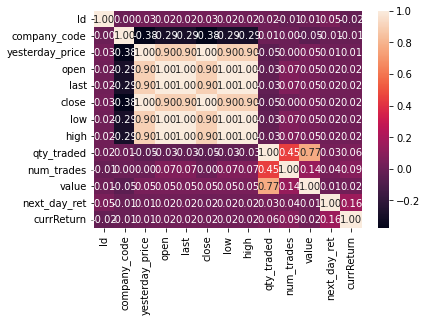

In [18]:
train_corr=train.corr()
sns.heatmap(train_corr, annot=True, fmt='0.2f')

In [19]:
train["medium"]=train["high"]-train["low"]
test["medium"]=test["high"]-test["low"]
train["OC"]=train["close"]-train["open"]
test["OC"]=test["close"]-test["open"]


In [20]:
L=['open','close','high','low','last']
for e in L : 
  train.drop(e,axis=1,inplace=True)
  test.drop(e,axis=1,inplace=True)

In [21]:
train.head()

,Id,date,company_code,company,yesterday_price,qty_traded,num_trades,value,next_day_ret,currReturn,medium,OC
0,0,2018-01-02,725001,ADWYA,5.35,2926,7,15635.500000,-161.101159,0.000177,0.14,0.14
1,1,2018-01-02,340005,AMEN BANK,24.35,1519,12,36918.000000,-91.056323,0.000177,0.38,-0.38
2,2,2018-01-02,730001,ARTES,6.20,35875,67,219020.050000,159.011983,0.000177,0.18,-0.17
3,3,2018-01-02,714001,ASSAD,9.00,0,0,116575.070241,-98.000768,0.000177,0.00,9.00
4,4,2018-01-02,360035,ATB,4.22,3705,7,15465.900000,-158.659992,0.000177,0.03,0.03


In [22]:
train.shape , test.shape 

((20417, 12), (20331, 11))

**we will check if there is a normality in one of the features or the target** 

In [23]:
print("skewness: %f" % train['next_day_ret'].skew())
print("kurtosis: %f" % train['next_day_ret'].kurt())

skewness: -6.750935
kurtosis: 358.786178


In [24]:
print("skewness: %f" % train['value'].skew())
print("kurtosis: %f" % train['value'].kurt())

skewness: 79.055884
kurtosis: 8134.971006


no need to fit the distribution to a normal one 

**outlayers** 

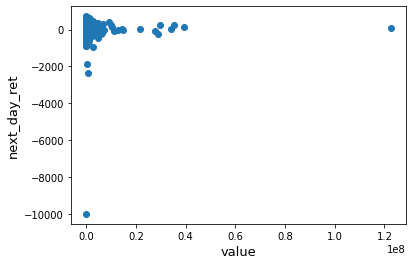

In [25]:
fig, ax = plt.subplots()
ax.scatter(train['value'], train['next_day_ret'])
plt.ylabel('next_day_ret', fontsize=13)
plt.xlabel('value', fontsize=13)
plt.show()

i tested all the features : no outlayers in all of them 

In [26]:
train.drop("company",axis=1,inplace=True)
test.drop("company",axis=1,inplace=True)

In [27]:
train.set_index("date",inplace=True)
test.set_index("date",inplace=True)

In [28]:
target=train["next_day_ret"]
target.shape

(20417,)

In [29]:
train.drop("next_day_ret",axis=1,inplace=True)
train_id=train["Id"]
test_id=test["Id"]
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [30]:
all_data=pd.concat([train,test])

In [31]:
all_data.shape

(40748, 8)

# data scaling 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_all_data = scaler.fit_transform(all_data)



# PCA 

In [33]:
from sklearn.decomposition import PCA
num_pc = 4

X = np.asarray(scaled_all_data)
[n,m] = X.shape
print ('The number of timestamps is {}.'.format(n))


pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% of the variance is explained by the first 4 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

The number of timestamps is 40748.
76.11% of the variance is explained by the first 4 PCs


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_all_data)
PCA_data = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'],index=all_data.index)



In [35]:
PCA_data.head()

,principal component 1,principal component 2,principal component 3,principal component 4
date,,,,
2018-01-02,-0.462399,0.495299,-0.188804,0.090863
2018-01-02,0.222562,-0.726054,-0.035705,0.081523
2018-01-02,0.393474,0.797934,-0.862968,0.003482
2018-01-02,-0.477389,0.274691,0.469545,-0.086906
2018-01-02,-0.226342,-0.011408,0.288806,-0.050941


In [36]:
all_data["principal component 1"]=PCA_data["principal component 1"]
all_data["principal component 2"]=PCA_data["principal component 2"]
all_data["principal component 3"]=PCA_data["principal component 3"]
all_data["principal component 4"]=PCA_data["principal component 4"]

In [37]:
all_data.head()

,company_code,yesterday_price,qty_traded,num_trades,value,currReturn,medium,OC,principal component 1,principal component 2,principal component 3,principal component 4
date,,,,,,,,,,,,
2018-01-02,725001,5.35,2926,7,15635.500000,0.000177,0.14,0.14,-0.462399,0.495299,-0.188804,0.090863
2018-01-02,340005,24.35,1519,12,36918.000000,0.000177,0.38,-0.38,0.222562,-0.726054,-0.035705,0.081523
2018-01-02,730001,6.20,35875,67,219020.050000,0.000177,0.18,-0.17,0.393474,0.797934,-0.862968,0.003482
2018-01-02,714001,9.00,0,0,116575.070241,0.000177,0.00,9.00,-0.477389,0.274691,0.469545,-0.086906
2018-01-02,360035,4.22,3705,7,15465.900000,0.000177,0.03,0.03,-0.226342,-0.011408,0.288806,-0.050941


# factor analysis 

In [38]:
pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(all_data)
kmo_model

0.36150807614532693

In [40]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(all_data)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [41]:
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([ 2.98736038e+00,  2.86809301e+00,  2.23142010e+00,  2.00172869e+00,
        7.98630944e-01,  7.53097630e-01,  2.31013019e-01,  1.28656225e-01,
        6.35657834e-16, -4.37069365e-16, -5.52760822e-16, -8.16765993e-16])

we have four eigenvalues >1 , so 4 factors to analyse

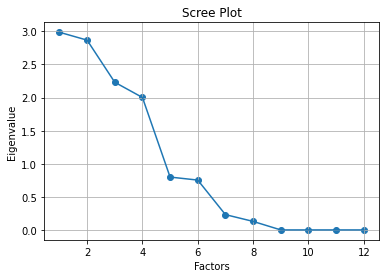

In [42]:
plt.scatter(range(1,all_data.shape[1]+1),eigen_values)
plt.plot(range(1,all_data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [43]:
features=['medium','OC','yesterday_price']
i=0
all_data['factor']=0
for feat in features: 
    all_data['factor']=all_data['factor'] + fa.loadings_[:,0][i]*all_data[feat] + fa.loadings_[:,1][i]*all_data[feat]

In [44]:
all_data.corr()

,company_code,yesterday_price,qty_traded,num_trades,value,currReturn,medium,OC,principal component 1,principal component 2,principal component 3,principal component 4,factor
company_code,1.000000,-0.353482,0.002786,-0.000354,-0.040034,-0.004711,-0.152096,-0.193813,-2.585817e-01,5.169485e-01,-2.716914e-01,6.793635e-02,0.358154
yesterday_price,-0.353482,1.000000,-0.032592,0.030217,0.034926,0.005559,0.638889,0.339555,4.128765e-01,-8.178966e-01,-1.072601e-02,5.804401e-02,-0.940150
qty_traded,0.002786,-0.032592,1.000000,0.311872,0.843870,0.036744,0.001102,-0.034647,8.243437e-01,4.711743e-01,1.757402e-01,1.870785e-02,0.038924
num_trades,-0.000354,0.030217,0.311872,1.000000,0.122231,0.086480,0.194943,-0.146057,4.590094e-01,1.312016e-01,-5.388952e-01,-8.421476e-02,0.025960
value,-0.040034,0.034926,0.843870,0.122231,1.000000,0.013599,0.048572,-0.000011,8.093243e-01,3.860745e-01,2.853716e-01,6.488140e-02,-0.028939
currReturn,-0.004711,0.005559,0.036744,0.086480,0.013599,1.000000,0.032251,0.006051,1.002392e-01,5.643122e-03,-2.027958e-01,-9.491951e-01,-0.007273
medium,-0.152096,0.638889,0.001102,0.194943,0.048572,0.032251,1.000000,-0.075937,4.367865e-01,-6.036112e-01,-4.967405e-01,1.691723e-01,-0.503506
OC,-0.193813,0.339555,-0.034647,-0.146057,-0.000011,0.006051,-0.075937,1.000000,6.293276e-02,-4.233811e-01,6.832877e-01,-2.291329e-01,-0.639528
principal component 1,-0.258582,0.412877,0.824344,0.459009,0.809324,0.100239,0.436787,0.062933,1.000000e+00,-4.803855e-16,2.564589e-17,-6.621862e-17,-0.362842
principal component 2,0.516948,-0.817897,0.471174,0.131202,0.386074,0.005643,-0.603611,-0.423381,-4.803855e-16,1.000000e+00,-1.013202e-16,7.579939e-17,0.824001


i didn't find a high correlation 

# data spliting 

In [45]:
#split data
train = pd.DataFrame(all_data[:train.shape[0]])
test = pd.DataFrame(all_data[train.shape[0]:])
train.shape,test.shape

((20417, 13), (20331, 13))

In [46]:
# split train dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 33)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16333, 13), (4084, 13), (16333,), (4084,))

# Modeling 

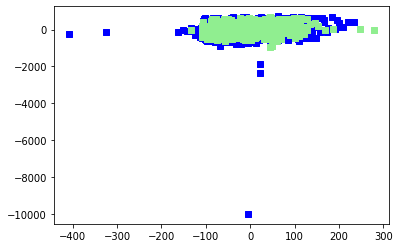

In [47]:
lin_reg = linear_model.LinearRegression()
# train model
lin_reg.fit(X_train, y_train)
# predict
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
# Plot predictions
fig=plt.figure()
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
error =np.sqrt(mean_squared_error( y_test, y_test_pred ))
print(error)

171.84918199562202


In [49]:
prediction=lin_reg.predict(test)

In [50]:
next_day_pred=pd.DataFrame()

In [51]:
next_day_pred["Id"]=test_id
next_day_pred["next_day_ret"]=prediction

In [52]:
next_day_pred.head()

,Id,next_day_ret
date,,
2019-01-02,20417,-9.178432
2019-01-02,20418,-3.783573
2019-01-02,20419,-9.195985
2019-01-02,20420,-2.612437
2019-01-02,20421,-2.655544


In [53]:
next_day_pred.to_csv("Houssem project 11.csv",index=False)